# Continuous distributions

We will again be illustrating some ideas using the Adult data set.

In [1]:
import pandas as pd
import seaborn as sns

names = [ 
    "age","workclass","fnlwgt","education","education_num",
    "marital_status","occupation","relationship","race","sex",
    "capital_gain","capital_loss","hours_per_week","country","income_level"
]
dtypes = [ 
    "int64","category","int64","category","int64",
    "category","category","category","category","category",
    "int64","int64","int64","category","category"
]
adult = pd.read_table("adult.data",delimiter=",",names=names,dtype=dict(zip(names,dtypes)))
bysex = adult.groupby("sex")

## Distribution functions

The **cumulative distribution function** (CDF) is the inverse of percentiles. Specifically, $F(x)$ is the probability that a population value will be less than or equal to $x$. The domain of $F$ is the real line (unless otherwise restricted), and the range is the interval $[0,1]$.

When a sample is used to estimate a continuous CDF, the resulting is a stair-step (piecewise constant) graph known as the **empirical CDF**.

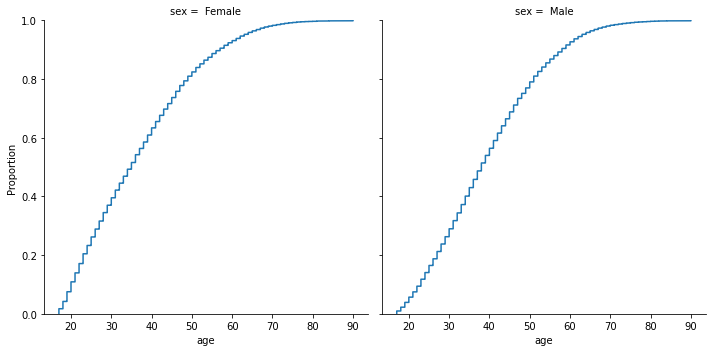

In [2]:
sns.displot(adult,x="age",col="sex",kind="ecdf");

For a simple, continuous probability distribution, we can expect the CDF to be continuous and differentiable. The derivative of the CDF is called the **probability distribution function** (PDF), and it is the continuous analog of a histogram divided into infinitesimally small bins. 


## Exponential distribution

An **exponential distribution** is a distribution on nonnegative real numbers. It is parameterized by a positive number $\lambda$. It has PDF equal to 

```{math}
f(x) = \lambda e^{-\lambda x}
```

and CDF equal to

```{math}
F(x) = 1 - e^{-\lambda x}.
```

The mean of the distribution is $1/\lambda$, the variance is $1/\lambda^2$, and the median is $\ln(2)/\lambda$.

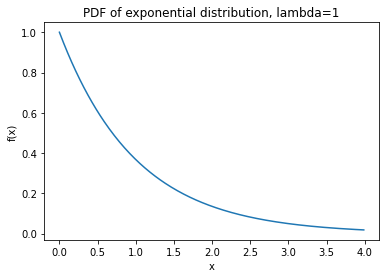

In [3]:
import numpy as np
import matplotlib.pyplot as plt

lam = 1
x = np.arange(0,300)*4/300
plt.plot(x,lam*np.exp(-lam*x))
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("PDF of exponential distribution, lambda=1");

The exponential distribution is often used as a model for randomly occurring events, such as the time between callers to a customer service line or the magnitudes of earthquakes.

## Normal distribution

The granddaddy of distributions is the **normal** or **Gaussian** distribution. It is parameterized by its mean $\mu$ and standard deviation $\sigma$, and has PDF

$$
f(x) = \frac{1}{\sqrt{2\pi\sigma^2}} \exp\left( -\frac{(x-\mu)^2}{2\sigma^2} \right).
$$

The CDF cannot be expressed using elementary functions. A normal PDF is peaked at the mean and drops off superexponentially and symmetrically on both sides.

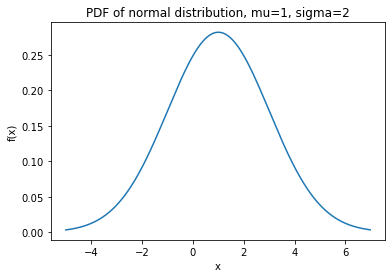

In [4]:
import numpy as np
import matplotlib.pyplot as plt

mu = 1
sigma = 2
x = mu + np.arange(-200,200)*12/400
s = np.sqrt(2*np.pi*sigma)
plt.plot(x,np.exp(-(x-mu)**2/(2*sigma*2))/s)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("PDF of normal distribution, mu=1, sigma=2");

For normally distributed data, a common definition of outliers is to reject values that satisfy $|x-\mu|>2\sigma$, which would discard about 5% of values on average. A less aggressive criterion uses $3\sigma$ instead of $2\sigma$. 

## Kernel density estimation

It can be helpful to go from a discrete distribution, as described by a histogram, with a continuous function that estimates the PDF. One technique to do this is called **kernel density estimation** (KDE).

Let $g(x)$ be a normal distribution with mean zero and a chosen variance. If we have samples $x_1,\ldots,x_n$, define

$$
\tilde{f}(x) = \sum_{i=1}^n g(x-x_i).
$$

That is, we add up normal distributions centered at the observed values. Finally, we define

$$
\frac{\tilde{f}(x) }{\int_{-\infty}^\infty \tilde{f}(x) \, dx}
$$

as the KDE approximation to the PDF.

For example, here again are the sex-grouped histograms for ages in the Adult data set:

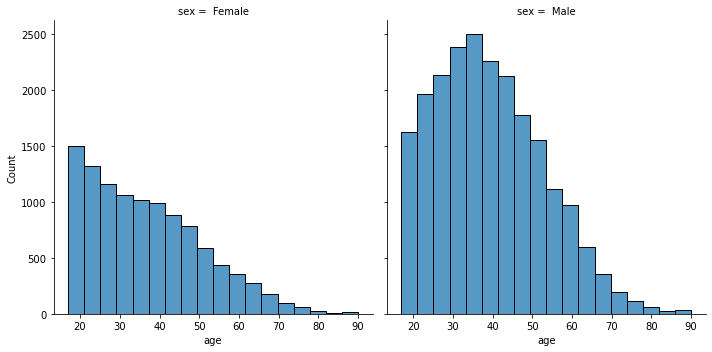

In [5]:
sns.displot(adult,x="age",col="sex",bins=18)

And here are the KDE estimates:

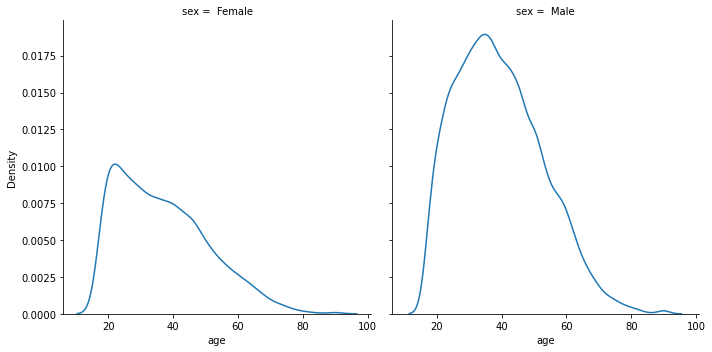

In [6]:
sns.displot(adult,x="age",col="sex",kind="kde")